# Sentiment Analysis and Classification of TwitterData
Andrés Ocabo (andoc277)

## Read the data

In [2]:
import pandas as pd
import numpy as np
import csv

df = pd.read_csv('Twitter_Data.csv')

#This line is for using the Reddit data file
#df = df.rename(columns = {'clean_comment': 'clean_text'}, inplace = False)

#Remove all samples with null in class or document
df = df[pd.notnull(df.clean_text) & pd.notnull(df.category)]

#Show the first rows of the data frame
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


Text(0, 0.5, 'Samples')

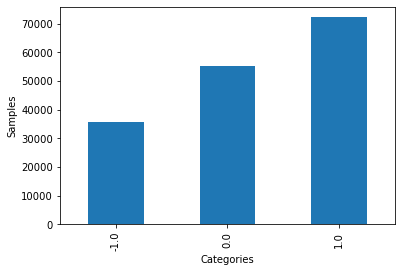

In [3]:
# Plotting the number of samples in each class
ax = df['category'].value_counts().plot(kind='bar')
ax.set_xlabel('Categories')
ax.set_ylabel('Samples')

In [4]:
# This is only for trying the balanced dataset (not used for the report)
'''value = df['category'].value_counts().min(axis=0)
df_balanced = df.groupby('category').sample(n = value)

import matplotlib.pyplot as plt
df_balanced['category'].plot.hist(bins=3)
plt.xlabel('Category')
plt.show()'''

"value = df['category'].value_counts().min(axis=0)\ndf_balanced = df.groupby('category').sample(n = value)\n\nimport matplotlib.pyplot as plt\ndf_balanced['category'].plot.hist(bins=3)\nplt.xlabel('Category')\nplt.show()"

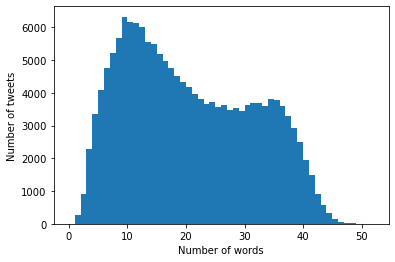

52
0


In [22]:
# Plotting the histogram fo number of word in each tweet (not preprocessed)
tweet_list = [tweet for tweet in df['clean_text']]
number_of_words = []
for item in tweet_list:
    number_of_words.append(len(item.split()))

import matplotlib.pyplot as plt
ax = plt.hist(number_of_words, 52)
plt.xlabel('Number of words')
plt.ylabel('Number of tweets')
plt.show()
print(max(np.array(number_of_words)))
print(min(np.array(number_of_words)))

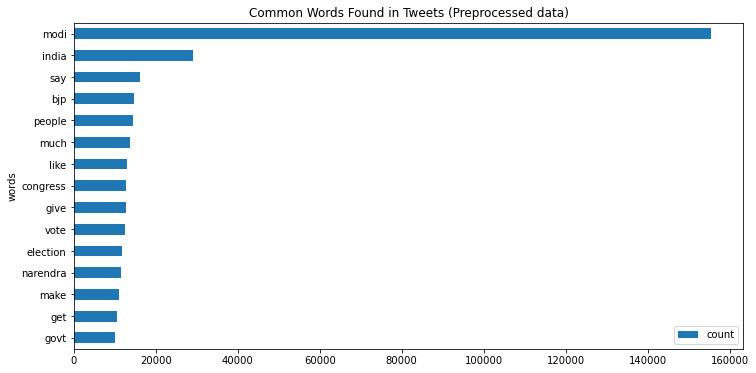

In [9]:
# Plotting the most common words in the data set (preprocess function must be defined before)
import itertools
import collections
import matplotlib.pyplot as plt

words_in_tweet = [preprocess(tweet) for tweet in df['clean_text']]

all_words = list(itertools.chain(*words_in_tweet))
counts  = collections.Counter(all_words)
counts.most_common(15)
clean_tweets = pd.DataFrame(counts.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(12, 6))

# Plot horizontal bar graph
clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax)

ax.set_title("Common Words Found in Tweets (Preprocessed data)")

plt.show()

## Analysis

In [10]:
#Filter NaN values in the data frames and divide the dataset by depending on the class
pos_df = df[(df.category == 1) & pd.notnull(df.clean_text)]
neg_df = df[(df.category == -1) & pd.notnull(df.clean_text)]
neu_df = df[(df.category == 0) & pd.notnull(df.clean_text)]
print(pos_df['clean_text'].isnull().values.any())
print(neg_df['clean_text'].isnull().values.any())
print(neu_df['clean_text'].isnull().values.any())

False
False
False


In [11]:

# Fucntion for showing a wordcloud of one dataframe
from wordcloud import WordCloud
from nltk.corpus import stopwords
def show_wc(df,stopword=False, colormap = 'rainbow'):
    if stopword:
        stop_words = stopwords.words('english')
        wc = WordCloud(max_words=100, background_color='white',stopwords=stop_words,colormap=colormap,
                       height=700,width=1000)
    else:
        wc = WordCloud(max_words=100, background_color='white',colormap=colormap,height=700,width=1000)
    text =df.clean_text.values
    wc.generate(str(text))
    
    fig = plt.figure()
    plt.imshow(wc)
    fig.set_figwidth(10)
    fig.set_figheight(10)

    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()


#Preprocess function is defined here
import spacy
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser", "ner","textcat"])
stop_words = stopwords.words('english')
def preprocess(text):
    doc = nlp(text)
    out = [word.lemma_ for word in doc if not(word.lemma_ in stop_words) and nlp(word.lemma_)[0].is_alpha]
    
    #This lines has been used for trying different kind of preprocess (not in the report)
    
    #out = [word.lemma_ for word in doc if not(word.is_stop) and nlp(word.lemma_)[0].is_alpha]
    #out = [word.lemma_ for word in doc if nlp(word.lemma_)[0].is_alpha]
    #out = [word.lower_ for word in doc]
    
    return out

#Function to alculate the most frequent words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def most_freq(df):
    
    #Tf-idf-vectorizer
    '''pos_idf = vectorizer_cv.idf_
    # We sort the values in increasing order and extract the indices
    idx = np.squeeze(np.asarray(pos_idf.argsort()))

    # The terms with the highest and lowest idf are taken
    low_idx = idx[:10]
    low_terms = [vectorizer_cv.get_feature_names()[i] for i in low_idx]
    high_idx = idx[::-1][:10]
    high_terms = [vectorizer_cv.get_feature_names()[i] for i in high_idx]

    print('Highest: ', high_terms)
    print('Lowest: ', low_terms)'''
    
    #Count-vectorizer
    vectorizer = CountVectorizer(tokenizer = preprocess, max_features = 100)
    cv_pos = vectorizer.fit_transform(df['clean_text']) #It takes 5 min
    dic = vectorizer.vocabulary_
    
    dictlist = []
    for key, value in dic.items():
        dictlist.append(key)
    
    return dictlist

In [12]:
pos = most_freq(pos_df)
print('Positive: ', pos)
neg = most_freq(neg_df)
print('Negative: ', neg)
neu = most_freq(neu_df)
print('Neutral: ', neu)

Positive:  ['say', 'vote', 'modi', 'bjp', 'rahul', 'think', 'ask', 'chowkidar', 'great', 'see', 'much', 'come', 'world', 'leader', 'today', 'may', 'election', 'india', 'go', 'govt', 'gandhi', 'thing', 'like', 'good', 'would', 'need', 'give', 'time', 'people', 'minister', 'talk', 'well', 'know', 'one', 'anti', 'congress', 'support', 'become', 'political', 'new', 'via', 'man', 'make', 'job', 'show', 'year', 'get', 'indian', 'watch', 'modis', 'win', 'pakistan', 'family', 'never', 'country', 'use', 'money', 'last', 'achievement', 'government', 'even', 'take', 'sir', 'thank', 'nation', 'narendra', 'party', 'opposition', 'power', 'prime', 'love', 'also', 'right', 'live', 'want', 'promise', 'strong', 'back', 'every', 'proud', 'work', 'let', 'call', 'seat', 'day', 'please', 'happen', 'hai', 'medium', 'credit', 'address', 'big', 'true', 'question', 'many', 'space', 'scientist', 'mission', 'satellite', 'drdo']
Negative:  ['modi', 'promise', 'government', 'job', 'state', 'take', 'year', 'get', 'v

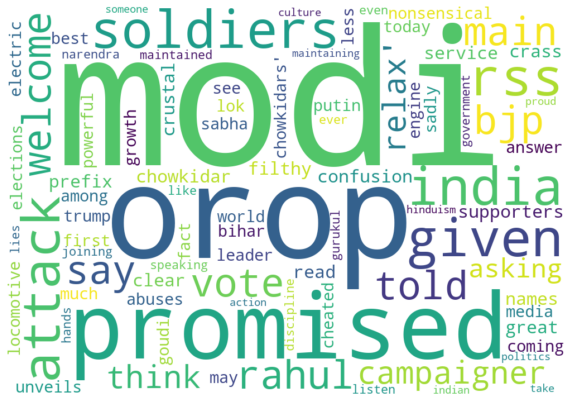

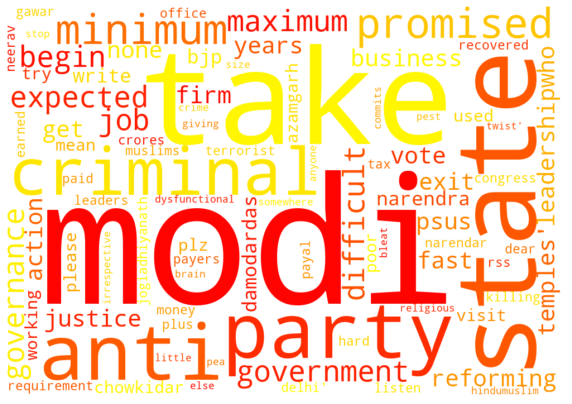

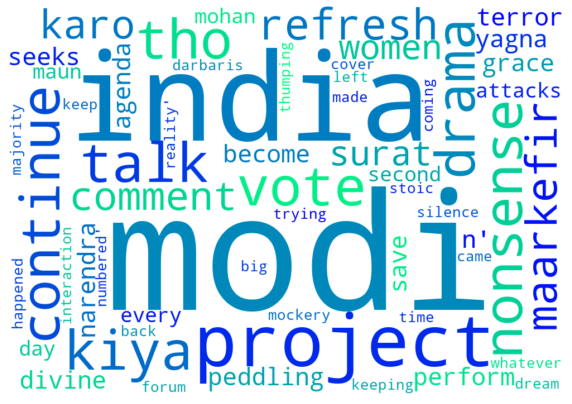

In [28]:
# Word clouds of each class of the dataset
show_wc(pos_df, stopword=True, colormap = 'viridis')
show_wc(neg_df, stopword=True, colormap = 'autumn')
show_wc(neu_df, stopword=True, colormap = 'winter')

## Text processing
Here, the dataset is divided anf the k-fold manager funtion too. Also here we have the 3 different processing of the data for extracting the features that will be used during the training and testing the models.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

seed = 4321
x_train_data, x_test_data, y_train, y_test = train_test_split(df['clean_text'],df['category'],test_size=0.25, 
                                                    random_state = seed)
x_train_data = x_train_data.reset_index()['clean_text']
x_test_data = x_test_data.reset_index()['clean_text']
y_train = y_train.reset_index()['category']
y_test = y_test.reset_index()['category']
k = 5
kfold = KFold(n_splits=k, shuffle = True, random_state = seed)

### Processing with Keras

In [52]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_fatures = 1000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(x_train_data.values)
#x_text = X1_test


#x_train = tokenizer.texts_to_matrix(x_train_data.values, mode = 'tfidf')
#x_test = tokenizer.texts_to_matrix(x_test_data.values, mode = 'tfidf')


x_train = tokenizer.texts_to_sequences(x_train_data.values)
x_test = tokenizer.texts_to_sequences(x_test_data.values)
n_test = len(x_test)
n_train = len(x_train)
x = x_train + x_test

x = pad_sequences(x)
x_train = x[:n_train,:]
x_test = x[-n_test:,:]
#print(x.shape)

#x_train = pad_sequences(x_train)
#x_test = pad_sequences(x_test)
#y_train = pd.get_dummies(y_train).values
#y_test = pd.get_dummies(y_test).values

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
#print(type(x_test))

(122226, 47) (122226,)
(40743, 47) (40743,)


### Processing with Sklearn

#### Tfidf-vectorizer

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer = preprocess, max_features = 1000, ngram_range = (1,2))
x_train = vectorizer.fit_transform(x_train_data) #It takes less than 1 min
x_test = vectorizer.transform(x_test_data) # It takes less than 30 sec

#### Count-vectorizer

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer = preprocess, max_features = 1000, ngram_range = (1,2))
x_train = vectorizer.fit_transform(x_train_data) #It takes less than 1 min
x_test = vectorizer.transform(x_test_data) # It takes less than 30 sec

In [15]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
#print(type(x_test))

(122226, 1000) (122226,)
(40743, 1000) (40743,)


## Training and Evaluation 

In [16]:
# Class defined to save and show the results during the k-fold cross validation
class Results:
    def __init__(self, k):
        self.results = {'Negative':{'precision': 0, 'recall': 0, 'f1-score': 0},
           'Neutral':{'precision': 0, 'recall': 0, 'f1-score': 0},
           'Positive':{'precision': 0, 'recall': 0, 'f1-score': 0},
           'Accuracy':0
          }
        self.k = k
    def save(self, report):
        self.results['Negative']['precision'] = self.results['Negative']['precision'] + report['-1.0']['precision']/self.k
        self.results['Neutral']['precision'] = self.results['Neutral']['precision'] + report['0.0']['precision']/self.k
        self.results['Positive']['precision'] = self.results['Positive']['precision'] + report['1.0']['precision']/self.k

        self.results['Negative']['recall'] = self.results['Negative']['recall'] + report['-1.0']['recall']/self.k
        self.results['Neutral']['recall'] = self.results['Neutral']['recall'] + report['0.0']['recall']/self.k
        self.results['Positive']['recall'] = self.results['Positive']['recall'] + report['1.0']['recall']/self.k

        self.results['Negative']['f1-score'] = self.results['Negative']['f1-score'] + report['-1.0']['f1-score']/self.k
        self.results['Neutral']['f1-score'] = self.results['Neutral']['f1-score'] + report['0.0']['f1-score']/self.k
        self.results['Positive']['f1-score'] = self.results['Positive']['f1-score'] + report['1.0']['f1-score']/self.k

        self.results['Accuracy'] = self.results['Accuracy'] + report['accuracy']/self.k
        
        return self.results
    
    def show(self):
        import pprint
        pprint.pprint(self.results)

### Multinomial Naive Bayes

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [18]:
print('VALIDATION RESULTS:')
results = Results(k)

for train, val in kfold.split(x_train):
    X_train, Y_train = x_train[train], y_train[train]
    X_val, Y_val = x_train[val,:], y_train[val]
    
    MNB = MultinomialNB(alpha=0.1)
    MNB.fit(X_train, Y_train)
    
    Y_pred = MNB.predict(X_val)
    report = classification_report(Y_val, Y_pred, output_dict= True)
    results.save(report)

results.show()

VALIDATION RESULTS:
{'Accuracy': 0.677605444483671,
 'Negative': {'f1-score': 0.49032380327550373,
              'precision': 0.8266429784464784,
              'recall': 0.3485608177040743},
 'Neutral': {'f1-score': 0.672810966858719,
             'precision': 0.7068608704890353,
             'recall': 0.6419535297771484},
 'Positive': {'f1-score': 0.735937484368848,
              'precision': 0.6398534397091409,
              'recall': 0.8660161467351227}}


In [19]:
MNB = MultinomialNB(alpha=0.1)
MNB.fit(x_train, y_train)

print('TRAIN RESULTS:')
y_pred = MNB.predict(x_train)
report = classification_report(y_train, y_pred, output_dict= True)
results = Results(1)
results.save(report)
results.show()

print('TEST RESULTS:')
y_pred = MNB.predict(x_test)
report = classification_report(y_test, y_pred, output_dict= True)
results = Results(1)
results.save(report)
results.show()


TRAIN RESULTS:
{'Accuracy': 0.6840770376188372,
 'Negative': {'f1-score': 0.49834730412248457,
              'precision': 0.8333775537277792,
              'recall': 0.35545077329309693},
 'Neutral': {'f1-score': 0.6814510059705987,
             'precision': 0.7115651604453176,
             'recall': 0.6537822811620015},
 'Positive': {'f1-score': 0.7410705139822394,
              'precision': 0.6464450676344441,
              'recall': 0.8681485037015156}}
TEST RESULTS:
{'Accuracy': 0.6739562624254473,
 'Negative': {'f1-score': 0.48901355773726035,
              'precision': 0.8182529335071708,
              'recall': 0.3487054117124125},
 'Neutral': {'f1-score': 0.6695585996955861,
             'precision': 0.6972578855603107,
             'recall': 0.6439759918020788},
 'Positive': {'f1-score': 0.7327008401774756,
              'precision': 0.639069575957184,
              'recall': 0.8584780444641079}}


### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
results = Results(k)

for train, val in kfold.split(x_train):
    X_train, Y_train = x_train[train], y_train[train]
    X_val, Y_val = x_train[val,:], y_train[val]
    
    rfc = RandomForestClassifier(n_estimators= 50, random_state = seed)
    rfc.fit(X_train, Y_train) # Less than 1:15 min (I dont know)
    
    Y_pred = rfc.predict(X_val)
    report = classification_report(Y_val, Y_pred, output_dict= True)
    results.save(report)

results.show()

{'Accuracy': 0.7887847081591934,
 'Negative': {'f1-score': 0.6531406733992213,
              'precision': 0.7904831466756377,
              'recall': 0.5565368968230433},
 'Neutral': {'f1-score': 0.8088188617841716,
             'precision': 0.7370178190005051,
             'recall': 0.8961604454368342},
 'Positive': {'f1-score': 0.8287270527432703,
              'precision': 0.8375270195466971,
              'recall': 0.8201142044411094}}


In [22]:
rfc = RandomForestClassifier(n_estimators= 50, random_state = seed)
rfc.fit(x_train, y_train) # Less than 1:15 min (I dont know)

print('TRAIN RESULTS:')
y_pred = rfc.predict(x_train)
report = classification_report(y_train, y_pred, output_dict= True)
results = Results(1)
results.save(report)
results.show()

print('TEST RESULTS:')
y_pred = rfc.predict(x_test)
report = classification_report(y_test, y_pred, output_dict= True)
results = Results(1)
results.save(report)
results.show()

TRAIN RESULTS:
{'Accuracy': 0.9918511609641156,
 'Negative': {'f1-score': 0.9921095557831645,
              'precision': 0.9977491225392949,
              'recall': 0.9865333836288193},
 'Neutral': {'f1-score': 0.9888616964125829,
             'precision': 0.9810498389236308,
             'recall': 0.9967989602637849},
 'Positive': {'f1-score': 0.9940443662297966,
              'precision': 0.997453436930741,
              'recall': 0.9906585190244983}}
TEST RESULTS:
{'Accuracy': 0.7861227695555064,
 'Negative': {'f1-score': 0.659001356501518,
              'precision': 0.7869484726936131,
              'recall': 0.5668407600844538},
 'Neutral': {'f1-score': 0.8041820094687006,
             'precision': 0.7299749313596753,
             'recall': 0.8951837212706778},
 'Positive': {'f1-score': 0.8259855573351317,
              'precision': 0.8395498943279831,
              'recall': 0.8128525605574605}}


### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
results = Results(k)

for train, val in kfold.split(x_train):
    X_train, Y_train = x_train[train], y_train[train]
    X_val, Y_val = x_train[val,:], y_train[val]
    
    #25 iters is enough
    LR = LogisticRegression(penalty = 'l1', max_iter=1000, solver = 'liblinear')
    LR.fit(X_train, Y_train)
    
    Y_pred = LR.predict(X_val)
    report = classification_report(Y_val, Y_pred, output_dict= True)
    results.save(report)

results.show()

{'Accuracy': 0.7892755906979668,
 'Negative': {'f1-score': 0.659907827991675,
              'precision': 0.7841295827539092,
              'recall': 0.5696901662830507},
 'Neutral': {'f1-score': 0.8067682343663874,
             'precision': 0.7266210686087119,
             'recall': 0.9068122353978993},
 'Positive': {'f1-score': 0.8299729287981656,
              'precision': 0.8547640539665396,
              'recall': 0.806584565190037}}


In [25]:
LR = LogisticRegression(penalty = 'l1', max_iter=1000, solver = 'liblinear')
LR.fit(X_train, Y_train)

print('TRAIN RESULTS:')
y_pred = LR.predict(x_train)
report = classification_report(y_train, y_pred, output_dict= True)
results = Results(1)
results.save(report)
results.show()

print('TEST RESULTS:')
y_pred = LR.predict(x_test)
report = classification_report(y_test, y_pred, output_dict= True)
results = Results(1)
results.save(report)
results.show()

TRAIN RESULTS:
{'Accuracy': 0.792744587894556,
 'Negative': {'f1-score': 0.6663901683001899,
              'precision': 0.7908398528573649,
              'recall': 0.5757827235005658},
 'Neutral': {'f1-score': 0.8096406717177671,
             'precision': 0.7297542693764005,
             'recall': 0.9091674889889046},
 'Positive': {'f1-score': 0.8327320370651679,
              'precision': 0.8571959109477922,
              'recall': 0.8096257869182344}}
TEST RESULTS:
{'Accuracy': 0.783594727928724,
 'Negative': {'f1-score': 0.6570531308081778,
              'precision': 0.7761962447001817,
              'recall': 0.5696188465385043},
 'Neutral': {'f1-score': 0.8007119741100324,
             'precision': 0.7176586610975751,
             'recall': 0.9055043185477968},
 'Positive': {'f1-score': 0.8249149586942229,
              'precision': 0.8537364652979114,
              'recall': 0.7979758876230505}}
